# DISCLAIMER:
### ON RESTARTING THE JUPYTER NOTEBOOK, THE ACCURACY OF THE USED MODELS MAY CHANGE DUE TO RANDOMNESS OF THE PREDICITONS. 
### SO, IF YOU FIND THAT THE PREDICTION'S ACCURACY HAS BEEN CHANGED AFTER RESTARTING THE JUPYTER NOTEBOOK, THEN DON'T WORRY. CHECK FOR THE MODEL'S ACCURACY AND AT THAT TIME, CHOOSE THE MODEL WHOSE ACCURACY IS THE BEST(AT THAT TIME) ACCORDING TO YOU.

#### For more such MACHINE LEARNING MODELS, follow Garvit Gupta on LinkedIN. Keep visiting to the WEBSITE for the MODELS

#### Here is the code for your model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

#### Description for this Dataset

#### Dataset contains 4 features namely, 
* Sepal Length(cm) 
* Sepal Width(cm) 
* Petal Length(cm) 
* Petal Width(cm)

#### We have to predict the values for the Target Names namely:- 
* Setosa     (denoted by 0)
* Versicolor (denoted by 1)
* Virginica  (denoted by 2)

### We'll be proceed for Classification Prediction Model like: Logistic Regression, Decision Tree Classifier and Random Forest CLassifier. 
##### Whichever provides the best classificaiton report values, we'll make it final and dump it in a JobLib file for deployment.


In [4]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Let's Proceed 

###### Only Features Dataset

In [5]:
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
df_feature = pd.DataFrame(data.data, columns = feature_names)
df_feature.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


###### Only Target Dataset

In [6]:
target_df = pd.DataFrame(data.target, columns = ['Target'])
target_df.head()

,Target
0,0
1,0
2,0
3,0
4,0


###### Concatenated Dataset

In [7]:
df = pd.concat([df_feature,target_df], axis = 1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##### Looking for some Outliers

Text(0.5, 1.0, 'Boxplots')

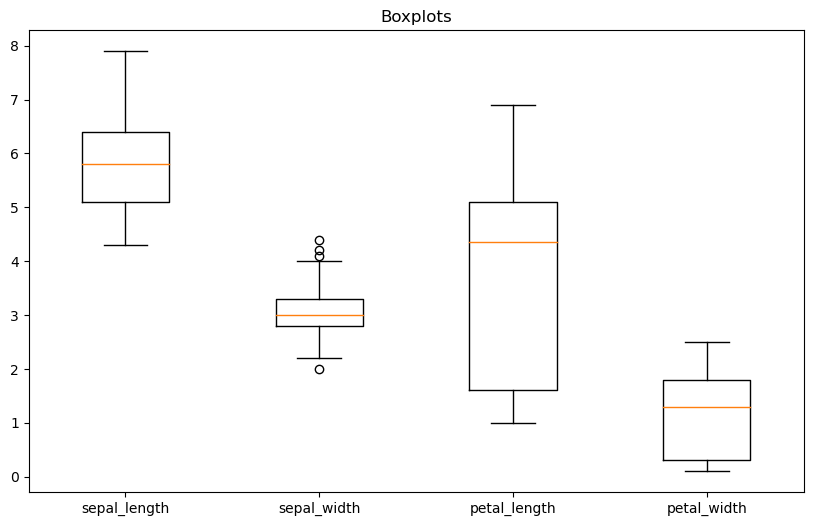

In [10]:
plt.figure(figsize = (10,6))
plt.boxplot([df[feature] for feature in feature_names], labels = feature_names)

plt.title("Boxplots")

Text(0, 0.5, 'Values')

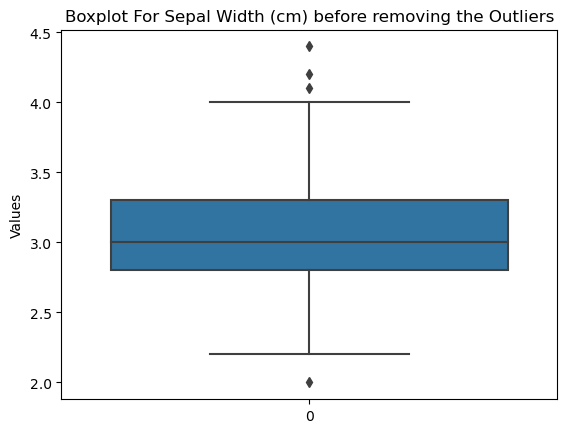

In [11]:
sns.boxplot(df['sepal_width'])
plt.title('Boxplot For Sepal Width (cm) before removing the Outliers')
plt.ylabel('Values')

###### So, some of the outliers can be seen in the Sepal Width (cm). So, We'll remove the outliers by repalcing them with the mean values 

In [12]:
mean = np.mean(df['sepal_width'])
print(f"Mean for the Sepal Width (cm) is :{round(mean,4)}")

Mean for the Sepal Width (cm) is :3.0573


In [13]:
upper_limit = np.percentile(df['sepal_width'],99)
print(f"The Upper Limit for Sepal Width(cm) is : {round(upper_limit,3)}")

The Upper Limit for Sepal Width(cm) is : 4.151


In [14]:
feature = df['sepal_width']

#### Replacing the outliers with the mean of the feature

In [15]:
df['sepal_width'] = feature.apply(lambda x: mean if x > upper_limit else x)

##### After removing the oultiers, our feature looks like this

Text(0, 0.5, 'Values')

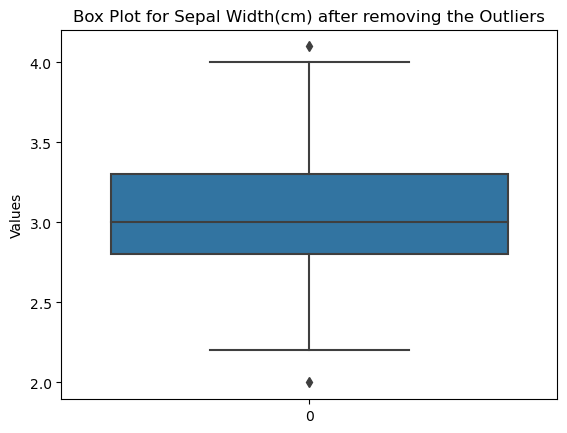

In [16]:
sns.boxplot(df['sepal_width'])
plt.title('Box Plot for Sepal Width(cm) after removing the Outliers')
plt.ylabel('Values')

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.040764,3.758000,1.199333,1.000000
std,0.828066,0.410903,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.100000,6.900000,2.500000,2.000000


#### Now, we'll check for the correlations between the Input Features and the Target Values 

In [19]:
cor_mat = df.corr()
cor_mat['Target'].sort_values(ascending=False)

Target          1.000000
petal_width     0.956547
petal_length    0.949035
sepal_length    0.782561
sepal_width    -0.403027
Name: Target, dtype: float64

<Axes: >

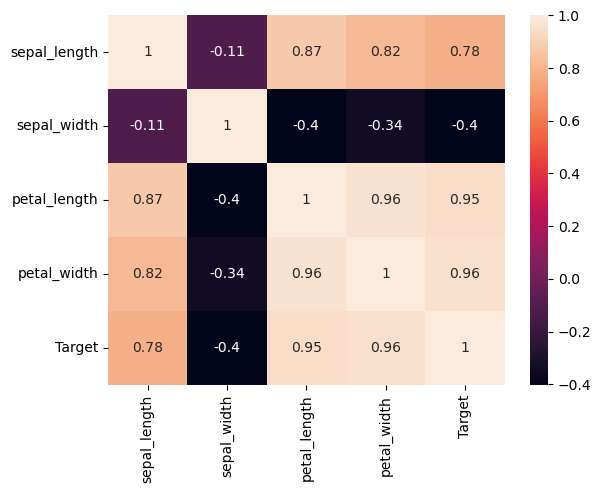

In [20]:
sns.heatmap(cor_mat, annot = True)

###### Now, Training and Testing the Data for predictions

In [21]:
x = df.drop(['Target'], axis = 1)
y = df['Target']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [23]:
LOR = LogisticRegression()
LOR.fit(x_train, y_train)

LogisticRegression()

In [24]:
Predictions = LOR.predict(x_test)

In [25]:
Pred_df = pd.DataFrame({'Predictions':Predictions,
                       'Original_values':y_test})

In [26]:
Pred_df.head()

,Predictions,Original_values
11,0,0
133,2,2
112,2,2
70,2,1
76,1,1


In [27]:
DCT = DecisionTreeClassifier()
DCT.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
Predictions1 = DCT.predict(x_test)

In [29]:
Pred_df1 = pd.DataFrame({'Predictions1':Predictions1,
                       'Original_values':y_test})
Pred_df1.head()

,Predictions1,Original_values
11,0,0
133,2,2
112,2,2
70,2,1
76,1,1


In [30]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
Predictions2 = RFC.predict(x_test)

In [32]:
Pred_df2 = pd.DataFrame({'Predictions2':Predictions2,
                       'Original_values':y_test})
Pred_df2.head()

,Predictions2,Original_values
11,0,0
133,2,2
112,2,2
70,2,1
76,1,1


##### Checking for the Accurcay and other factors that help us checking robustness of the model 

##### For Logistic Regression 

In [33]:
matrix = confusion_matrix(y_test,Predictions, labels = [0,1,2])
print('Confusion Matrix')
print(matrix)

print()
print("----------------------Classification Report -------------------")
report = classification_report(y_test, Predictions, labels = [0,1,2])
print(report)

Confusion Matrix
[[11  0  0]
 [ 0  9  2]
 [ 0  0  8]]

----------------------Classification Report -------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.82      0.90        11
           2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



##### For Decision Tree Classifier

In [34]:
matrix1 = confusion_matrix(y_test,Predictions1, labels = [0,1,2])
print("Confusion Matrix")
print(matrix1)

print()
print("----------------------Classification Report -------------------")
report1 = classification_report(y_test, Predictions1, labels = [0,1,2])
print(report1)

Confusion Matrix
[[11  0  0]
 [ 0  8  3]
 [ 0  0  8]]

----------------------Classification Report -------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.73      0.84        11
           2       0.73      1.00      0.84         8

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.89        30
weighted avg       0.93      0.90      0.90        30



###### For Random Forest Classifier 

In [35]:
matrix2 = confusion_matrix(y_test,Predictions2, labels = [0,1,2])
print("Confusion Matrix")
print(matrix2)

print()
print("----------------------Classification Report -------------------")
report2 = classification_report(y_test, Predictions2, labels = [0,1,2])
print(report2)

Confusion Matrix
[[11  0  0]
 [ 0  9  2]
 [ 0  0  8]]

----------------------Classification Report -------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.82      0.90        11
           2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



Logistic Regression is 100% but it can be over - fitting and we have to avoid that. So, we need to choose the model which gives considerable accuracy with other parameters too. 

Random Forest Classifier provides the best accuracy that is, 90 %. So, we'll go for that model only. 


#### Now Dumping our model to a Joblib file for further deployment

In [36]:
from joblib import dump,load
dump(RFC,"iris_model.joblib")

['iris_model.joblib']